In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset('penguins')

In [23]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
def uniform(data:pd.Series) -> pd.Series:
    length = data.size
    dis = data.value_counts()/length

    num_outcomes = data.nunique()
    expected_frequency = length/ num_outcomes

    actual_frequencies = data.value_counts()

    fig, ax = plt.subplots()
    ax.stem(actual_frequencies.index, actual_frequencies.values, linefmt = 'C0-', markerfmt = 'o', basefmt = 'C0-')
    ax.axhline(y = expected_frequency, color = 'r', linestyle = '--', label = 'Expected Frequency')
    ax.set_xlabel('Event')
    ax.set_ylabel('Frequency')
    ax.set_title('Event Distribution')
    plt.legend()
    plt.show()
    return dis

C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_14612\3399653164.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(data, bins = 30, color = 'k')


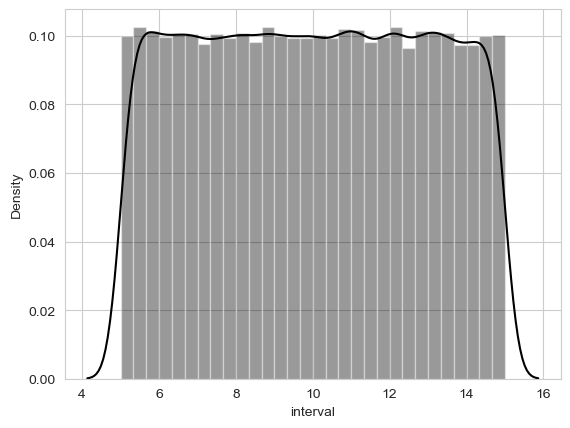

In [1]:
#Importing required libraries
from scipy.stats import uniform
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
 
#taking random variables from Uniform distribution
data = uniform.rvs(size = 100000, loc = 5, scale=10)
 
#Plotting the results
sb.set_style('whitegrid')
ax = sb.distplot(data, bins = 30, color = 'k')
ax.set(xlabel = 'interval')
plt.show()

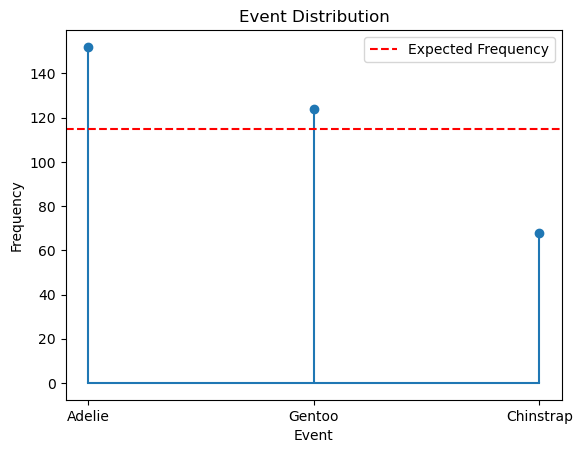

species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: count, dtype: float64

In [19]:
uniform(data.species)

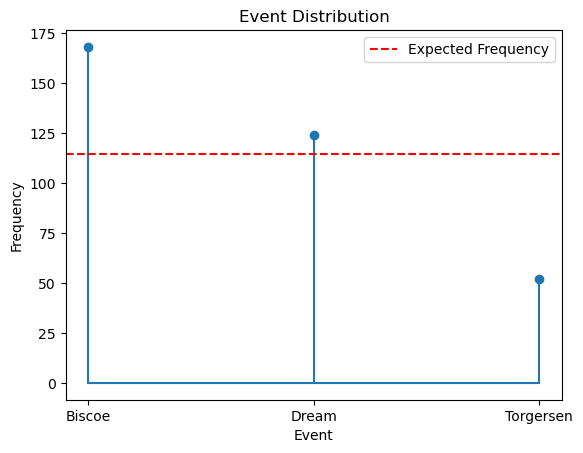

island
Biscoe       0.488372
Dream        0.360465
Torgersen    0.151163
Name: count, dtype: float64

In [25]:
uniform(data.island)

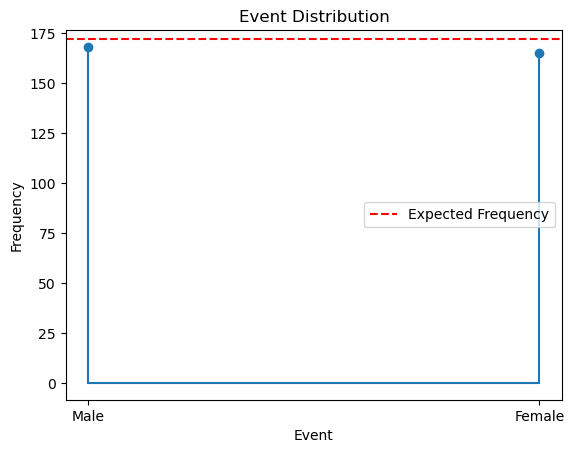

sex
Male      0.488372
Female    0.479651
Name: count, dtype: float64

In [27]:
uniform(data.sex)

# Bernoulli Distribution

In [34]:
import numpy as np

ex = np.random.randint(1,10,10)
data = pd.Series(ex, name = 'Sales')

threshold = 5
dist_data = (data > threshold).astype(int)

p = dist_data.mean()
q = 1-p

print("Sales Data : \n", data)
print("Binary Data (sales > 5):\n", dist_data)
print(f'Probability of meeting/exceeding threshold (p): {p:.2f}')
print(f'Probability of not meeting threshold (q): {q:.2f}')


Sales Data : 
 0    9
1    3
2    2
3    3
4    3
5    2
6    7
7    3
8    2
9    7
Name: Sales, dtype: int32
Binary Data (sales > 5):
 0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: Sales, dtype: int32
Probability of meeting/exceeding threshold (p): 0.30
Probability of not meeting threshold (q): 0.70


In [36]:
def bernoulli_pmf(x, p):
    return (p ** x) * (q ** (1-x))

x = 1
bernoulli_prob = bernoulli_pmf(x, p)
print(f'Bernoulli PMF for X={x} : {bernoulli_prob : .2f}')
    

Bernoulli PMF for X=1 :  0.30


# Binomial Dist

In [38]:
from scipy.stats import binom

n =  len(data)
k = 5

binom_prob = binom.pmf(k, n, p)
print(f'Binomial PMF for X={k}: {binom_prob: .2f}')


Binomial PMF for X=5:  0.10


# Poisson Distribution

In [46]:
import scipy.stats as stats

#Given Data
rate_per_hour = 2
time_period_minutes = 150
time_period_hours = time_period_minutes / 60

lambda_ = rate_per_hour * time_period_hours

# Q1 Probability of exactly 6 cars passing
prob_exactly_6 = stats.poisson.pmf(6, lambda_)
print(f'Probability of exactly 6 cars passing in 150 minutes : {prob_exactly_6 : .4f}')

# Q2 probability of at least 6 cars passing
prob_atleast_6 = stats.poisson.pmf(5, lambda_)
print(f'Probability of atleast 6 cars passing in 150 minutes : {prob_atleast_6 : .4f}')

Probability of exactly 6 cars passing in 150 minutes :  0.1462
Probability of atleast 6 cars passing in 150 minutes :  0.1755


# Continous Probability Distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
beml_df = pd.read_csv(r"https://raw.githubusercontent.com/slmsshk/DataSet-main/cc421c30de0909096e22e1cdecc00e78fba47b7d/BEML.csv")

In [12]:
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [22]:
beml_df.Date = pd.to_datetime(beml_df.Date)

In [24]:
beml_df.describe(include = 'all')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1739,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1.739000e+03,1739.000000
mean,2013-06-26 22:28:54.790109184,700.233180,713.384704,686.280276,698.413370,698.435221,2.352309e+05,1682.773985
min,2010-01-04 00:00:00,129.300000,133.500000,106.000000,128.900000,129.150000,2.441000e+03,16.130000
25%,2011-09-26 12:00:00,371.025000,379.300000,367.525000,370.550000,370.650000,5.878150e+04,263.160000
50%,2013-06-21 00:00:00,685.000000,699.800000,666.750000,683.000000,682.150000,1.282050e+05,678.090000
75%,2015-03-28 12:00:00,1012.000000,1027.800000,997.000000,1011.200000,1010.550000,2.513440e+05,1956.530000
max,2016-12-30 00:00:00,1569.800000,1612.000000,1540.250000,1555.850000,1558.500000,3.720854e+06,26358.000000
std,NaN,358.658024,364.165083,351.554420,357.358712,357.429870,3.561114e+05,2705.430289


In [26]:
glaxo_df = pd.read_csv(r"https://raw.githubusercontent.com/slmsshk/DataSet-main/cc421c30de0909096e22e1cdecc00e78fba47b7d/glaxo_df.csv")

In [28]:
glaxo_df.head()

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1616.80,-0.005444
1,2010-01-06,2010-01-06,1638.50,0.013422
2,2010-01-07,2010-01-07,1648.70,0.006225
3,2010-01-08,2010-01-08,1639.80,-0.005398
4,2010-01-11,2010-01-11,1629.45,-0.006312


In [32]:
glaxo_df.Date = pd.to_datetime(glaxo_df.Date)
glaxo_df.describe(include = 'all')

,Date,Date.1,Close,gain
count,1738,1738,1738.000000,1738.000000
unique,NaN,1738,NaN,NaN
top,NaN,2010-01-05,NaN,NaN
freq,NaN,1,NaN,NaN
mean,2013-06-27 16:01:06.283084032,NaN,2533.153596,0.000386
min,2010-01-05 00:00:00,NaN,1514.300000,-0.074719
25%,2011-09-27 06:00:00,NaN,2096.987500,-0.005850
50%,2013-06-22 12:00:00,NaN,2365.700000,-0.000021
75%,2015-03-29 06:00:00,NaN,3010.562500,0.005826
max,2016-12-30 00:00:00,NaN,3814.750000,0.189196


In [34]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

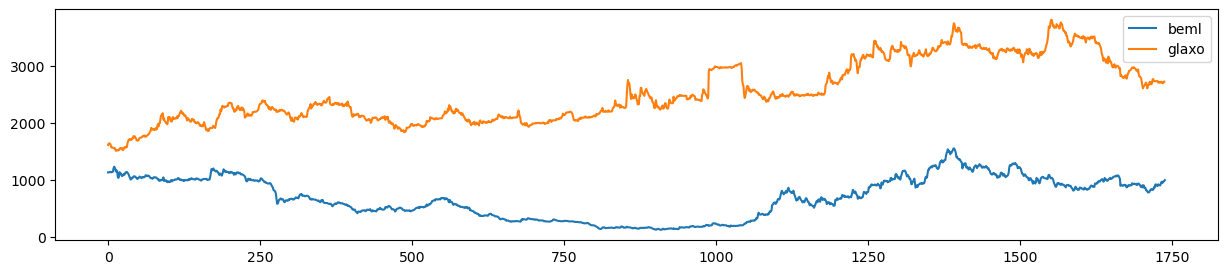

In [46]:
beml_df.Close.plot(figsize=(15,3), label = 'beml')
glaxo_df.Close.plot(figsize=(15,3), label = 'glaxo')
plt.legend()

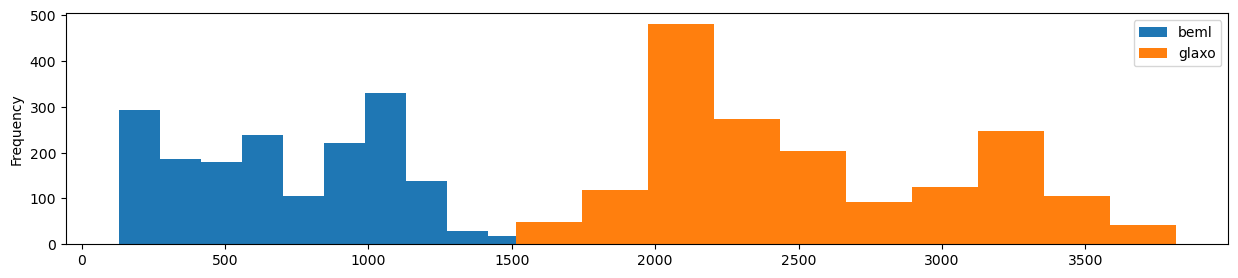

In [44]:
beml_df.Close.plot(kind = 'hist', figsize = (15,3), label = 'beml')
glaxo_df.Close.plot(kind = 'hist', figsize = (15,3), label = 'glaxo')
plt.legend()

# 6-Sept-2024

In [106]:
# null hypothesis

mean = 120
n = 80
sigma = 40
x_bar = 130

import math

def z(n,mean,sample_mean,std):
    score = (sample_mean-mean)/(std/math.sqrt(n))

In [108]:
import math

#```python
def z(n,mean,sample_mean,std):
    score = (sample_mean-mean)/(std/math.sqrt(n))
    return score

In [110]:
# null hypothesis

mean = 120
n = 80
sigma = 40
x_bar = 130

import math

def z(n,mean,sample_mean,std):
    score = (sample_mean-mean)/(std/math.sqrt(n))

In [112]:
import math

def z(n,mean,sample_mean,std):
    score = (sample_mean-mean)/(std/math.sqrt(n))
    return score

In [114]:
score = z(n, mean, x_bar, sigma)

In [116]:
from scipy import stats
1 - stats.norm.cdf(score)

0.0126736593387341

In [66]:
import math
from scipy.stats import norm

# z-test for one sample mean
def z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha):
    #calculate the standard error
    standard_error = sample_std_dev / math.sqrt(sample_size)

#calculate the z-score
    z = (sample_mean - claimed_mean) / standard_error

#calculate the p-value (one_tailed test)
    p_value = 1 - norm.cdf(z) #we use 1 - CDF(z) beacuse it's a right-tailed test

#Decision based on the level of significance(alpha)
    if p_value < alpha:
        decision = "Reject the null hypothesis launch the loyality program"
    else: 
        decision = "Fail to Reject the null hypothesis: Do not launch the loyality program"

    return z, p_value,decision

sample_mean = 130
claimed_mean = 120
sample_std_dev = 40
sample_size = 80
alpha = 0.05

# perform the Z-test
z_score, p_value, decision = z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha)

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")
print(f"z-Decision: {decision}")

z-score: 2.23606797749979
p-value: 0.0126736593387341
z-Decision: Reject the null hypothesis launch the loyality program


In [ ]:
# null hypothesis  >= 4
# alt hypothesis  = 4

In [82]:
import math
from scipy.stats import norm

# z-test for one sample mean
def z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha):
    #calculate the standard error
    standard_error = sample_std_dev / math.sqrt(sample_size)

#calculate the z-score
    z = (sample_mean - claimed_mean) / standard_error

#calculate the p-value (one_tailed test)
    p_value = 1 - norm.cdf(z) #we use 1 - CDF(z) beacuse it's a right-tailed test

#Decision based on the level of significance(alpha)
    if p_value < alpha:
        decision = "Reject the null hypothesis launch the loyality program"
    else: 
        decision = "Fail to Reject the null hypothesis: Do not launch the loyality program"

    return z, p_value,decision

sample_mean = 4
claimed_mean = 4.2
sample_std_dev = 3
sample_size = 50
alpha = 0.05

# perform the Z-test
z_score, p_value, decision = z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha)

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")
print(f"z-Decision: {decision}")

z-score: -0.4714045207910321
p-value: 0.6813240558830316
z-Decision: Fail to Reject the null hypothesis: Do not launch the loyality program


In [ ]:
# null hypothesis = <= 50
# alt hypothesis == 50

In [90]:
import math
from scipy.stats import norm

# z-test for one sample mean
def z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha):
    #calculate the standard error
    standard_error = sample_std_dev / math.sqrt(sample_size)

#calculate the z-score
    z = (sample_mean - claimed_mean) / standard_error

#calculate the p-value (one_tailed test)
    p_value = 1 - norm.cdf(z) #we use 1 - CDF(z) beacuse it's a right-tailed test

#Decision based on the level of significance(alpha)
    if p_value < alpha:
        decision = "Reject the null hypothesis launch the loyality program"
    else: 
        decision = "Fail to Reject the null hypothesis: Do not launch the loyality program"

    return z, p_value,decision

sample_mean = 48
claimed_mean = 50
sample_std_dev = 5
sample_size = 45
alpha = 0.05

# perform the Z-test
z_score, p_value, decision = z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha)

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")
print(f"z-Decision: {decision}")

z-score: -2.6832815729997477
p-value: 0.9963548209542322
z-Decision: Fail to Reject the null hypothesis: Do not launch the loyality program


In [ ]:
#null !=  100
# alt == 100

In [124]:
Use any built-In DataSet and generate descriptive stats and various probabilities,

z-score: -1.9364916731037087
p-value: 0.052807511416113506
z-Decision: Fail to Reject the null hypothesis: Do not launch the loyality program


In [ ]:
# null = 4.7
# alt != 4.7

In [130]:
import numpy as np
a = ([5,5,5,5,5])
std = np.std(a)
std

0.0

In [132]:
sample_mean = 5
claimed_mean = 4.7
sample_std_dev = 0
sample_size = 5
alpha = 0.05

In [140]:
import math
from scipy.stats import norm

# z-test for one sample mean
def z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha):
    #calculate the standard error
    standard_error = sample_std_dev / math.sqrt(sample_size)

#calculate the z-score
    z = (sample_mean - claimed_mean) / standard_error

#calculate the p-value (one_tailed test)
    p_value =  2 * (1 - norm.cdf(abs(z))) #we use 1 - CDF(z) beacuse it's a right-tailed test

#Decision based on the level of significance(alpha)
    if p_value < alpha:
        decision = "Reject the null hypothesis launch the loyality program"
    else: 
        decision = "Fail to Reject the null hypothesis: Do not launch the loyality program"

    return z, p_value,decision

sample_mean = 5
claimed_mean = 4.7
sample_std_dev = 3
sample_size = 3087
alpha = 0.05

# perform the Z-test
z_score, p_value, decision = z_test_mean(sample_mean, claimed_mean, sample_std_dev, sample_size, alpha)

print(f"z-score: {z_score}")
print(f"p-value: {p_value}")
print(f"z-Decision: {decision}")

z-score: 5.556077753235637
p-value: 2.7590400852872676e-08
z-Decision: Reject the null hypothesis launch the loyality program
